# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

   Pada proyek kali ini dataset yang digunakan ialah dataset "Loan Approval Classification" yang dapat diunduh melalui tautan berikut ini: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data   
   Dataset tersebut berisi beberapa kolom antara lain: 
   - person_age: Age of the person, Float
   - person_gender: Gender of the person, Categorical
   - person_education: Highest education level, Categorical
   - person_income: Annual income, Float
   - person_emp_exp: Years of employment experience, Integer
   - person_home_ownership: Home ownership status (e.g., rent, own, mortgage), Categorical
   - loan_amnt: Loan amount requested, Float
   - loan_intent: Purpose of the loan, Categorical
   - loan_int_rate: Loan interest rate, Float
   - loan_percent_income: 	Loan amount as a percentage of annual income, Float
   - cb_person_cred_hist_length: Length of credit history in years, Float
   - credit_score: Credit score of the person, Integer
   - previous_loan_defaults_on_file: Indicator of previous loan defaults, Categorical
   - loan_status (target variable): Loan approval status: 1 = approved; 0 = rejected, Integer


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
# Load Dataset
df = pd.read_csv("../loan_data_raw.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [233]:
# Resume Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [234]:
# Statistik Deskriptif
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [235]:
# Check Missing Values
missing_value = df.isnull().sum()

# Check Duplicated Data
duplicated_data = df.duplicated().sum()

print(f"Jumlah Missing Value: \n{missing_value}")
print(f"Jumlah Data Duplikat: {duplicated_data}")

Jumlah Missing Value: 
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64
Jumlah Data Duplikat: 0


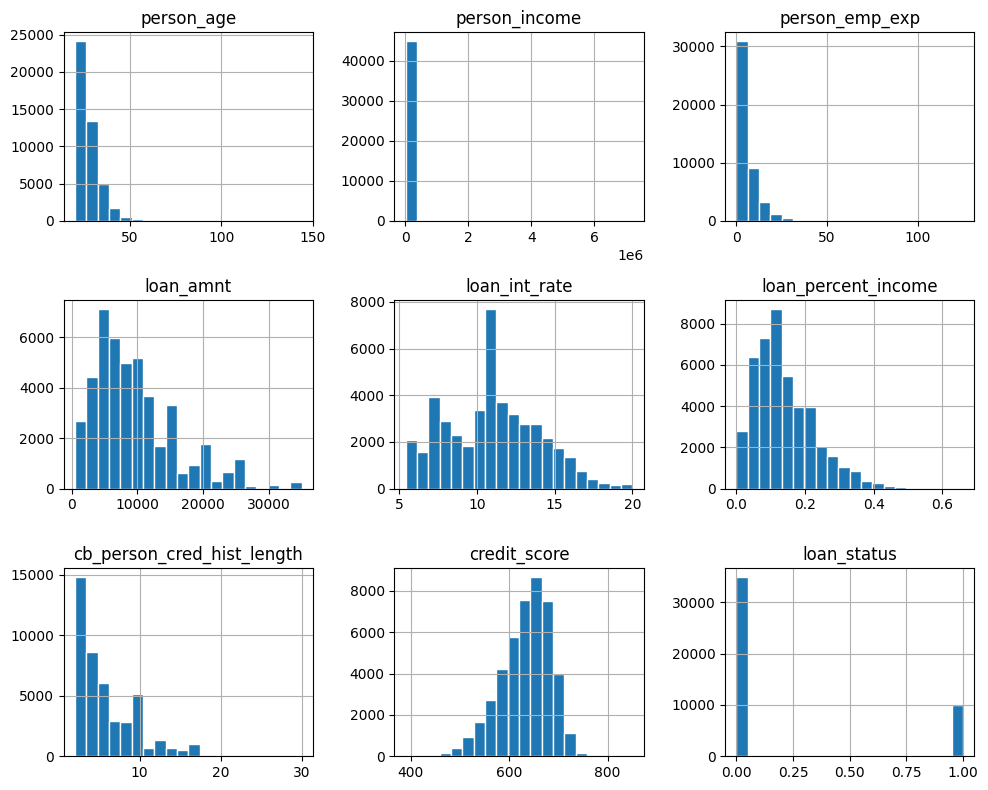

In [236]:
# Visualisasi Sebaran Data

numerical_column = df.select_dtypes(include=['number'])
categorical_column = df.select_dtypes(include=['object'])

# Data Numerikal
numerical_column.hist(figsize=(10,8), bins=20, edgecolor='white')
plt.tight_layout()
plt.show()

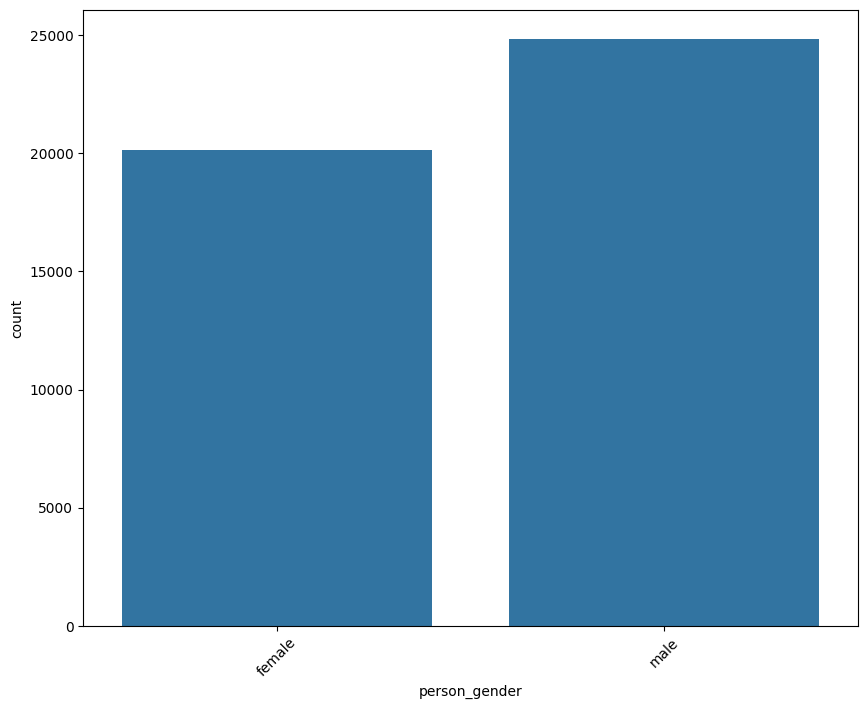

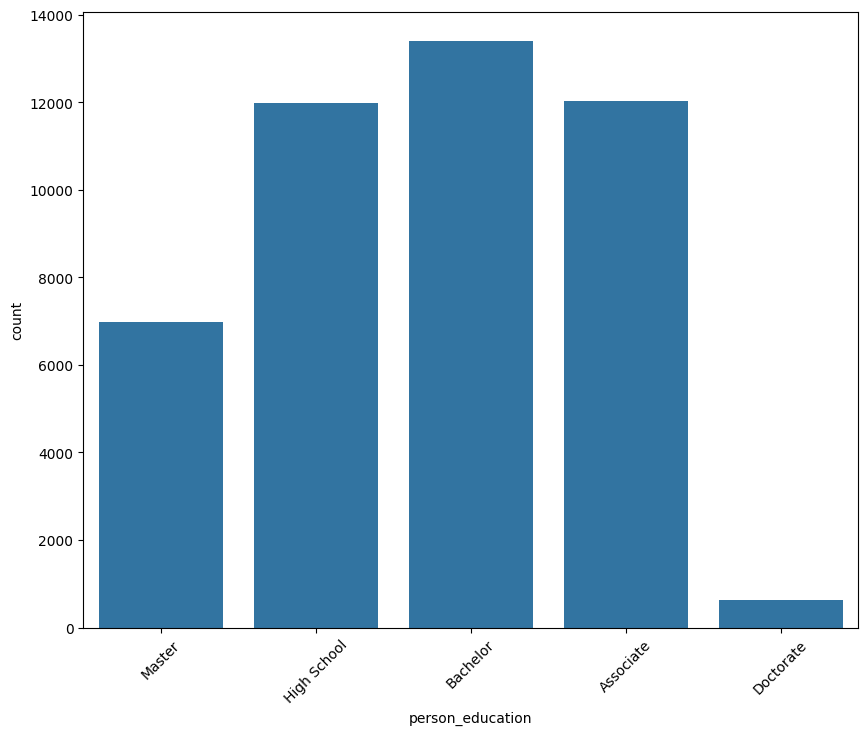

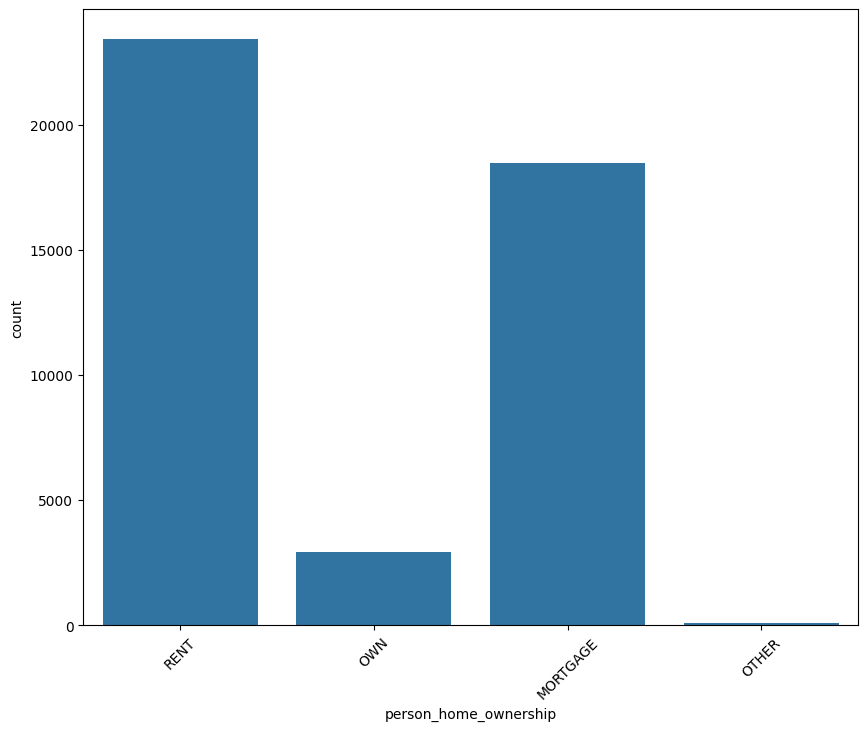

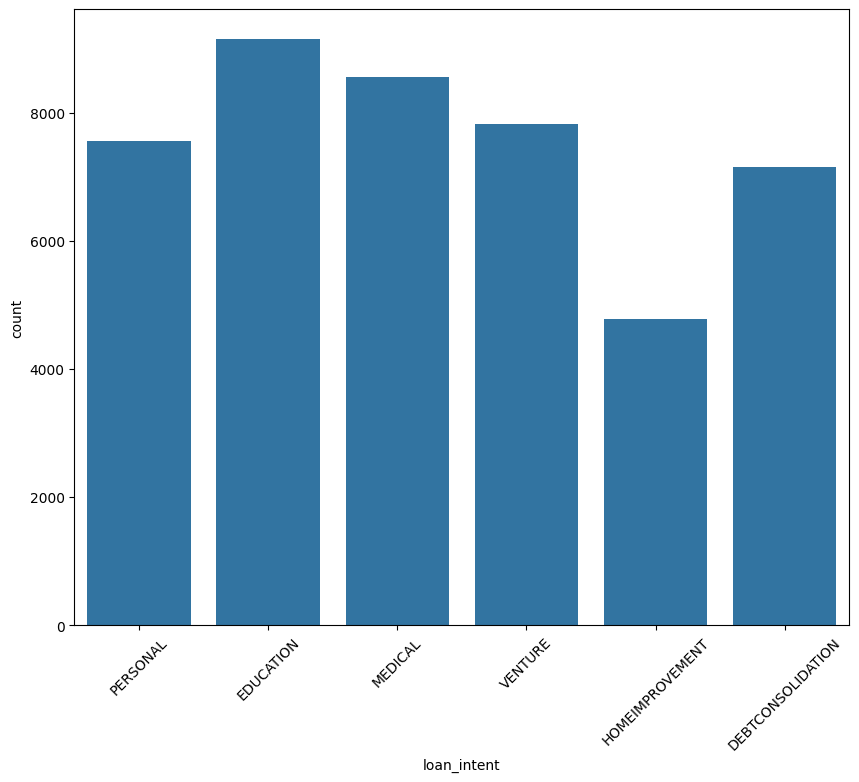

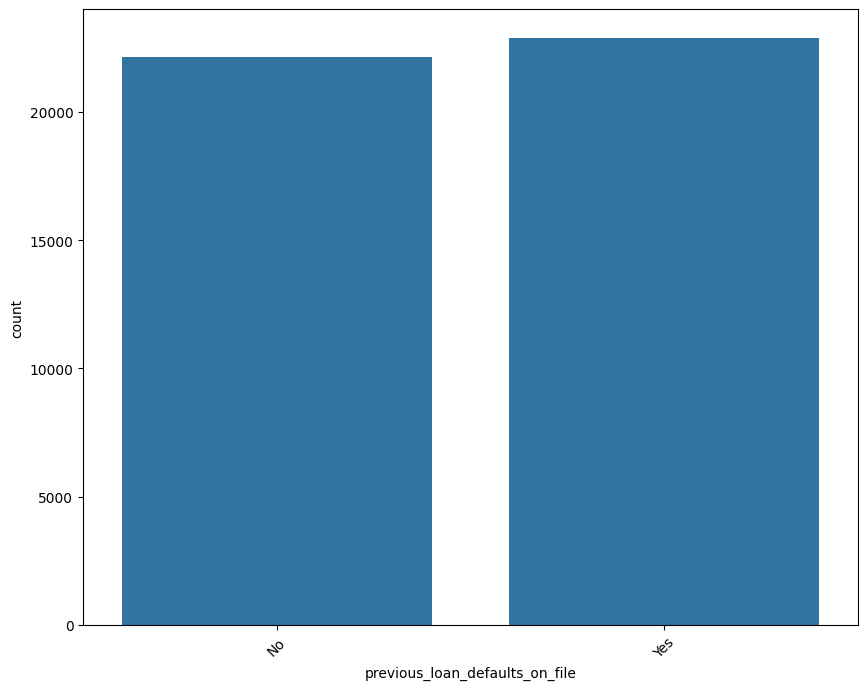

In [237]:
# Visualisasi Fitur Categorical
for categories in categorical_column:
    plt.figure(figsize=(10,8))
    sns.countplot(data=categorical_column, x=categories)
    plt.xticks(rotation=45)
    plt.show()
    

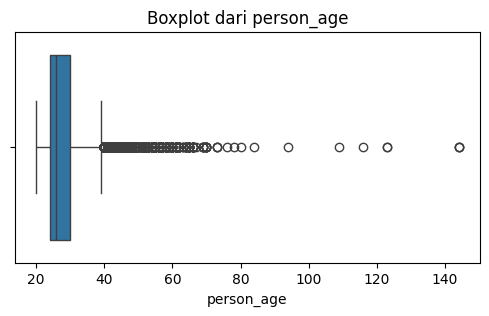

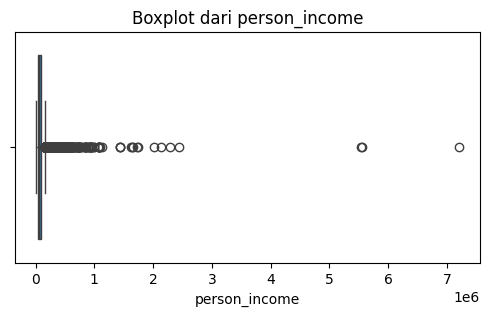

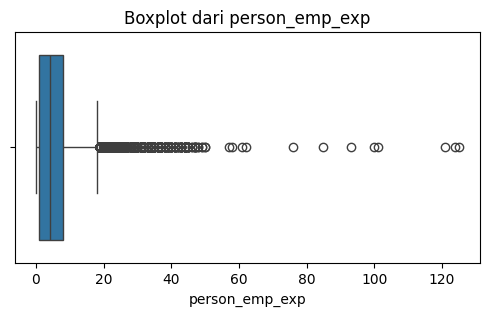

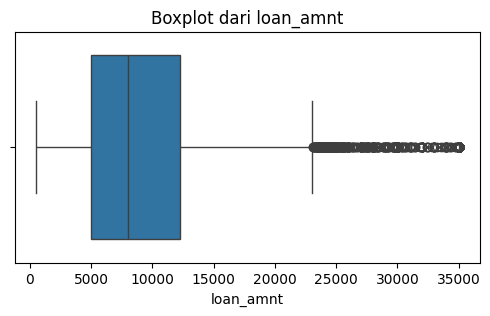

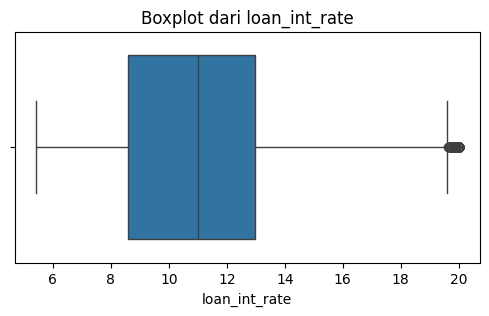

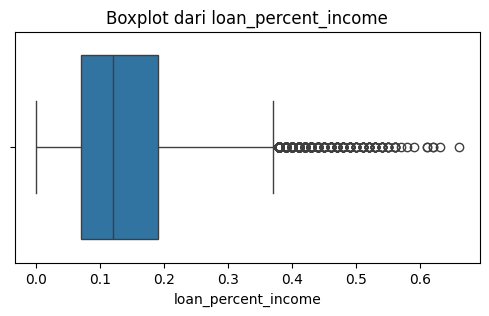

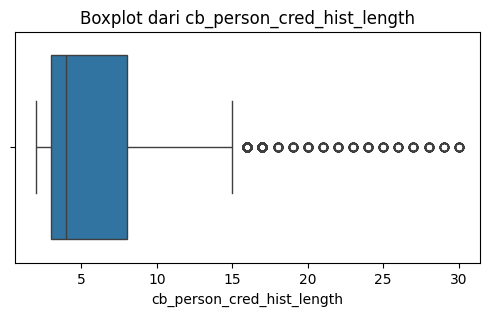

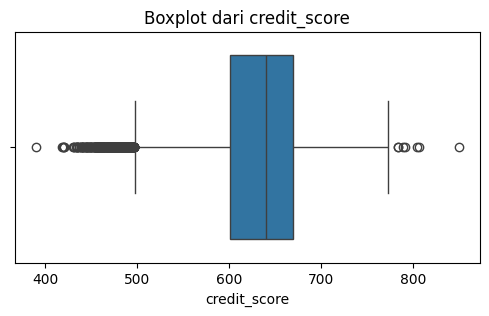

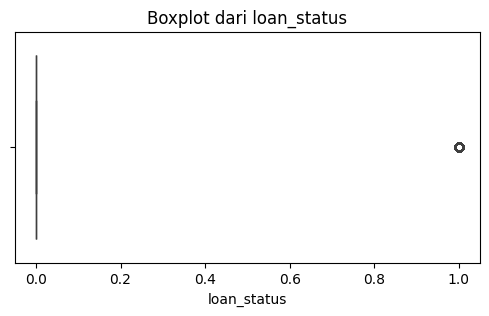

In [238]:
# Visualisasi Outlier
for numerical in numerical_column:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[numerical])
    plt.title(f"Boxplot dari {numerical}")
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# Hapus Missing value & duplicated data
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

numerical_column = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
                     'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

# Penanganan Outlier dengan IQR
Q1 = df[numerical_column].quantile(0.25)
Q3 = df[numerical_column].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numerical_column] < (Q1-1.5*IQR)) | (df[numerical_column] > (Q3+1.5*IQR))).any(axis=1)]

# Encoding 
## Binary Encoding
df['person_gender'] = df['person_gender'].map({'male':1, 'female':0})
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'Yes':1, 'No':0})

## Mapping Educational column
df['person_education'] = df['person_education'].map(
    {
        'High School': 0,
        'Associate': 1,
        'Bachelor': 2,
        'Master': 3,
        'Doctorate': 4
    }
)

## One Hot Encoding
df_encoded = df.copy()
df_encoded = pd.get_dummies(df, columns=['loan_intent', 'person_home_ownership'])

# Standardisasi
scaler = StandardScaler()
df_encoded[numerical_column] = scaler.fit_transform(df_encoded[numerical_column])


<class 'pandas.core.frame.DataFrame'>
Index: 37549 entries, 1 to 44999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      37549 non-null  float64
 1   person_gender                   37549 non-null  int64  
 2   person_education                37549 non-null  int64  
 3   person_income                   37549 non-null  float64
 4   person_emp_exp                  37549 non-null  float64
 5   loan_amnt                       37549 non-null  float64
 6   loan_int_rate                   37549 non-null  float64
 7   loan_percent_income             37549 non-null  float64
 8   cb_person_cred_hist_length      37549 non-null  float64
 9   credit_score                    37549 non-null  float64
 10  previous_loan_defaults_on_file  37549 non-null  int64  
 11  loan_status                     37549 non-null  int64  
 12  loan_intent_DEBTCONSOLIDATION   37549